# EDA for Events data

Load the data

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
from sqlalchemy import create_engine

DBDIR = "C:\\Users\\VishwasKSingh\\Workspace\\temp\\my_app_practice\\dbs"
engine = create_engine(f"sqlite:///{DBDIR}/events.db")

with engine.begin() as conn:
    df = pd.read_sql_table(
        table_name="events",
        con = conn
    )

df.head()

,event_id,topic,city,venue_capacity,scheduled_date_time,instructor_id,base_price,discount_code,discount_pct,currency,...,company,role,industry,notes,first_contact_channel,registration_lead_days,event_day_of_week,channel,spend,impressions
0,E001,Python OOP,Bengaluru,50,2026-01-13 10:00:00,I001,3000,STUDENT15,15,INR,...,Fabrikam,Engineer,Finance,Reached via partner. Promo=NY25; Phone:+91-978...,partner,3,Tuesday,email,7000,35000
1,E001,Python OOP,Bengaluru,50,2026-01-13 10:00:00,I001,3000,STUDENT15,15,INR,...,Fabrikam,Engineer,Finance,Reached via partner. Promo=NY25; Phone:+91-978...,partner,3,Tuesday,social,5000,10000
2,E001,Python OOP,Bengaluru,50,2026-01-13 10:00:00,I001,3000,STUDENT15,15,INR,...,Fabrikam,Engineer,Finance,Reached via partner. Promo=NY25; Phone:+91-978...,partner,3,Tuesday,partner,7000,20000
3,E001,Python OOP,Bengaluru,50,2026-01-13 10:00:00,I001,3000,STUDENT15,15,INR,...,Fabrikam,Developer,Finance,Reached via email. Promo=NY25; Phone:+91-94248...,email,29,Tuesday,email,7000,35000
4,E001,Python OOP,Bengaluru,50,2026-01-13 10:00:00,I001,3000,STUDENT15,15,INR,...,Fabrikam,Developer,Finance,Reached via email. Promo=NY25; Phone:+91-94248...,email,29,Tuesday,social,5000,10000


Descriptive statisical values

In [4]:
df.describe()

,venue_capacity,scheduled_date_time,base_price,discount_pct,effective_price,reg_timestamp,registration_lead_days,spend,impressions
count,270.000000,270,270.000000,270.000000,270.000000,270,270.000000,270.000000,270.000000
mean,45.222222,2026-01-29 11:51:20.000000256,2616.666667,17.277778,2154.166667,2026-01-14 12:23:20.000000256,14.977778,5148.148148,23962.962963
min,30.000000,2026-01-13 10:00:00,2000.000000,0.000000,1500.000000,2025-12-15 10:00:00,2.000000,3000.000000,10000.000000
25%,40.000000,2026-01-19 10:00:00,2000.000000,15.000000,2000.000000,2026-01-05 14:00:00,8.000000,3000.000000,10000.000000
50%,40.000000,2026-01-29 23:00:00,3000.000000,15.000000,2250.000000,2026-01-13 11:30:00,14.500000,5000.000000,20000.000000
75%,60.000000,2026-02-06 10:00:00,3000.000000,25.000000,2550.000000,2026-01-23 14:00:00,21.000000,7000.000000,35000.000000
max,60.000000,2026-02-15 11:00:00,3000.000000,25.000000,2700.000000,2026-02-09 11:00:00,30.000000,7000.000000,35000.000000
std,10.793201,NaN,454.531091,7.873103,367.921104,NaN,8.339423,1544.957109,10959.477511


Unique city and their counts

In [5]:
df['city'].value_counts()

city
Bengaluru    165
Mysuru        60
Pune          30
Hyderabad     15
Name: count, dtype: int64

Distribution of payment status

In [6]:
df['payment_status'].value_counts()

payment_status
paid         96
pending      90
cancelled    84
Name: count, dtype: int64

In [7]:
df.groupby('event_id')['payment_status'].value_counts()

event_id  payment_status
E001      cancelled         12
          paid               9
E002      pending           12
          paid               9
          cancelled          3
E003      paid              12
          cancelled          6
          pending            6
E004      cancelled          9
          pending            9
          paid               6
E005      paid              12
          cancelled          9
          pending            6
E006      cancelled          6
          pending            6
          paid               3
E007      pending           15
          paid               9
          cancelled          6
E008      cancelled          9
          paid               9
          pending            9
E009      cancelled          6
          paid               6
          pending            3
E010      paid              12
          cancelled          6
          pending            6
E011      cancelled         12
          pending            6
E012      pend

# Generating the Visualizations

Distribution of registration before the event

Text(0, 0.5, 'Number of Registrations')

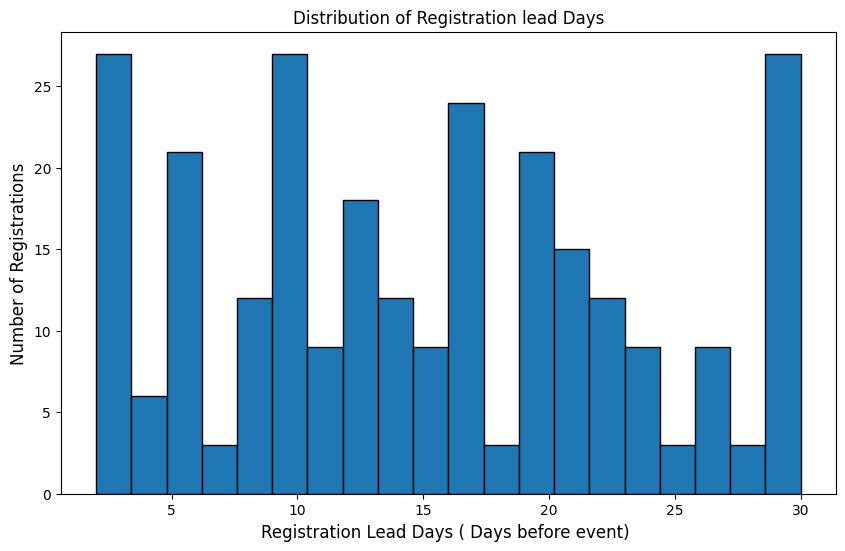

In [8]:
plt.figure(figsize=(10,6))
df_plot = df[df['registration_lead_days'] <= 90].copy()
plt.hist(df_plot['registration_lead_days'], bins=20, edgecolor='black',color='#1F77B4')
plt.title("Distribution of Registration lead Days")
plt.xlabel("Registration Lead Days ( Days before event) ",fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)

do people who get discounts pay more promptly?

In [9]:
df.columns

Index(['event_id', 'topic', 'city', 'venue_capacity', 'scheduled_date_time',
       'instructor_id', 'base_price', 'discount_code', 'discount_pct',
       'currency', 'effective_price', 'reg_id', 'attendee_email',
       'reg_timestamp', 'payment_status', 'ticket_type', 'company', 'role',
       'industry', 'notes', 'first_contact_channel', 'registration_lead_days',
       'event_day_of_week', 'channel', 'spend', 'impressions'],
      dtype='object')

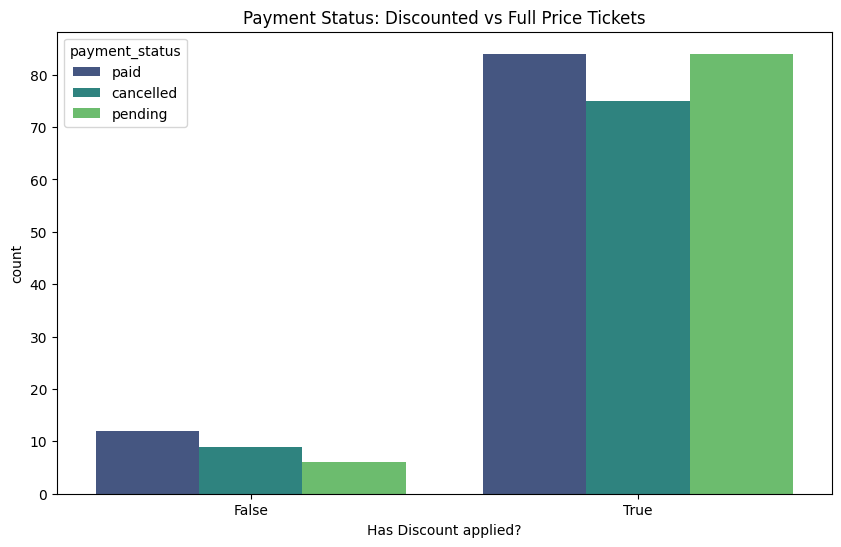

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df['has_discount'] = df['effective_price'] < df['base_price']

# Visualization for promptness (Paid vs Pending/Cancelled)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='has_discount', hue='payment_status', palette='viridis')
plt.title('Payment Status: Discounted vs Full Price Tickets')
plt.xlabel('Has Discount applied?')
plt.savefig('discount_payment_comparison.png')

Text(0.5, 1.0, 'Effective Price Distribution by Payment Status')

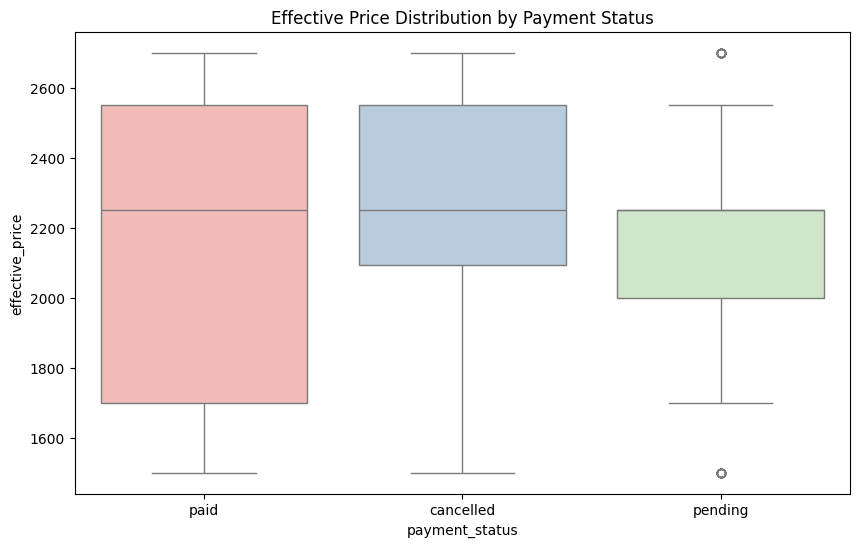

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='payment_status', y='effective_price', hue='payment_status', data=df, palette='Pastel1')
plt.title('Effective Price Distribution by Payment Status')

Based on the data analysis and the generated plots, the answer is actually no—the data suggests that people receiving discounts do not pay more promptly. In fact, they appear slightly more likely to cancel.

which topics have highest registrations

In [12]:
df['topic'].value_counts()

topic
Python OOP                     138
Machine Learning Essentials     90
Data Wrangling                  42
Name: count, dtype: int64

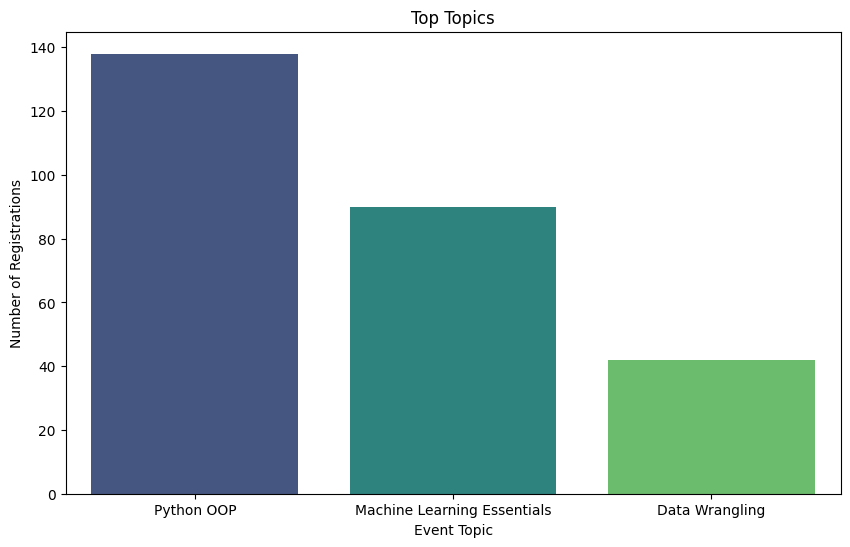

In [13]:
top_topics = df['topic'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=top_topics.index, y=top_topics.values,hue=top_topics.index, palette="viridis")
plt.title("Top Topics")
plt.xlabel("Event Topic")
plt.ylabel("Number of Registrations")
# plt.xticks(rotation=45)
plt.show()

In [14]:
# Interpretation summary for the generated visualizations

lines = []

# Top topics by registrations
if 'df' in globals():
    tc = df['topic'].value_counts()
    lines.append("Top topics by registrations:")
    for topic, cnt in tc.head(5).items():
        lines.append(f"  - {topic}: {cnt}")

# Registration lead days distribution
if 'df' in globals() and 'registration_lead_days' in df.columns:
    skew = df['registration_lead_days'].skew()
    med = df['registration_lead_days'].median()
    skew_desc = "right-skewed" if skew > 0 else ("left-skewed" if skew < 0 else "symmetric")
    lines.append(f"Registration lead days — median: {med:.1f}, skew: {skew:.2f} ({skew_desc})")

# Median lead days for top topics (if computed)
if 'medians' in globals():
    lines.append("Median registration lead days (top topics):")
    for topic, val in medians.items():
        lines.append(f"  - {topic}: {val}")

# Strong correlations from heatmap
if 'pairs' in globals() and pairs:
    lines.append("Strong correlations (abs>=0.5):")
    seen = set()
    for a, b, val in pairs:
        if (b, a) in seen:
            continue
        seen.add((a, b))
        sign = "positive" if val > 0 else "negative"
        lines.append(f"  - {a} <-> {b}: {val:.2f} ({sign})")

# Payment status proportions
if 'ps' in globals():
    lines.append("Payment status proportions (%):")
    for k, v in ps.round(2).items():
        lines.append(f"  - {k}: {v}")

# Effective price summary stats
if 'df' in globals() and 'effective_price' in df.columns:
    mean_ep = df['effective_price'].mean()
    med_ep = df['effective_price'].median()
    std_ep = df['effective_price'].std()
    lines.append(f"Effective price — mean: {mean_ep:.2f}, median: {med_ep:.2f}, std: {std_ep:.2f}")

# Median effective price by payment status (boxplot insight)
if 'df' in globals() and 'payment_status' in df.columns:
    med_by_status = df.groupby('payment_status')['effective_price'].median().sort_values(ascending=False)
    lines.append("Median effective price by payment status:")
    for k, v in med_by_status.items():
        lines.append(f"  - {k}: {v:.2f}")

# Relationship between registration lead days and effective price
if 'corr' in globals() and 'registration_lead_days' in corr.index and 'effective_price' in corr.columns:
    rel = corr.loc['registration_lead_days', 'effective_price']
    rel_desc = "weak positive" if 0 < rel < 0.3 else ("moderate" if 0.3 <= abs(rel) < 0.5 else ("strong" if abs(rel) >= 0.5 else "weak negative"))
    lines.append(f"Correlation registration_lead_days vs effective_price: {rel:.2f} ({rel_desc})")

print("\n".join(lines))

Top topics by registrations:
  - Python OOP: 138
  - Machine Learning Essentials: 90
  - Data Wrangling: 42
Registration lead days — median: 14.5, skew: 0.20 (right-skewed)
Effective price — mean: 2154.17, median: 2250.00, std: 367.92
Median effective price by payment status:
  - cancelled: 2250.00
  - paid: 2250.00
  - pending: 2250.00


In [15]:
df.columns

Index(['event_id', 'topic', 'city', 'venue_capacity', 'scheduled_date_time',
       'instructor_id', 'base_price', 'discount_code', 'discount_pct',
       'currency', 'effective_price', 'reg_id', 'attendee_email',
       'reg_timestamp', 'payment_status', 'ticket_type', 'company', 'role',
       'industry', 'notes', 'first_contact_channel', 'registration_lead_days',
       'event_day_of_week', 'channel', 'spend', 'impressions'],
      dtype='object')

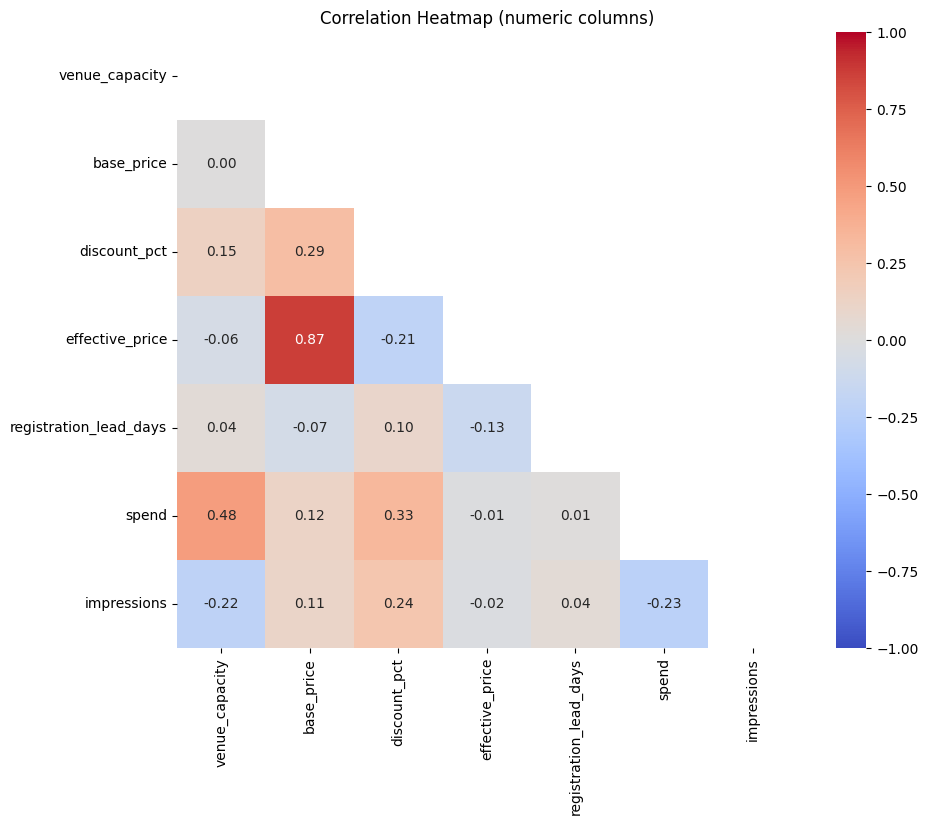

Strong correlations (abs>=0.5):
  base_price <-> effective_price: 0.87
  effective_price <-> base_price: 0.87


In [16]:
# Correlation heatmap for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(10,8))
    corr = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap (numeric columns)")
    plt.show()

    # Short interpretation: show strong correlations (abs >= 0.5)
    strong = (corr.abs() >= 0.5) & (corr.abs() < 1)
    pairs = [(i,j,corr.loc[i,j]) for i in corr.index for j in corr.columns if strong.loc[i,j]]
    if pairs:
        print("Strong correlations (abs>=0.5):")
        for a,b,val in pairs:
            print(f"  {a} <-> {b}: {val:.2f}")
    else:
        print("No strong correlations (abs>=0.5) found among numeric columns.")
else:
    print("Not enough numeric columns for a correlation heatmap.")


This correlation heatmap provides a snapshot of the relationships between various metrics related to event pricing, venue logistics, and marketing performance.

Correlation values range from -1.0 (perfect negative relationship) to 1.0 (perfect positive relationship), with 0 indicating no linear relationship.

Key Insights and Interpretations
1. Strongest Positive Relationship: Pricing Consistency
The strongest correlation in the dataset is between base_price and effective_price (0.87).

Interpretation: This is expected. While discounts exist, the final price paid by a customer is heavily dictated by the initial list price. If you raise the base price, the effective price moves upward in lockstep.

2. Marketing Spend & Venue Dynamics
There is a moderate positive correlation between spend and venue_capacity (0.48).

Interpretation: This suggests a strategic alignment where more marketing budget is allocated to larger venues. Essentially, the larger the "room" to fill, the more the organization spends on advertising to ensure it doesn't stay empty.

3. The Discounting Paradox
Discount vs. Spend (0.33): There is a slight positive trend showing that as marketing spend increases, discount percentages also tend to be higher. This could indicate "pushed" sales—using both ads and price cuts simultaneously to drive volume.

Discount vs. Base Price (0.29): This suggests that higher-priced items/events are more likely to have higher percentage discounts applied to them, perhaps to make the "sticker price" feel more accessible.

4. Weak or Non-Existent Relationships
Registration Lead Days: This variable has almost zero correlation with spend (0.01) or impressions (0.04). This implies that how early someone registers isn't necessarily driven by how much was spent on ads or how many times they saw an ad.

Venue Capacity vs. Base Price (0.00): There is no relationship here, meaning venue size does not dictate the price of the event. A small exclusive workshop and a large stadium event could theoretically have similar pricing structures in this dataset.

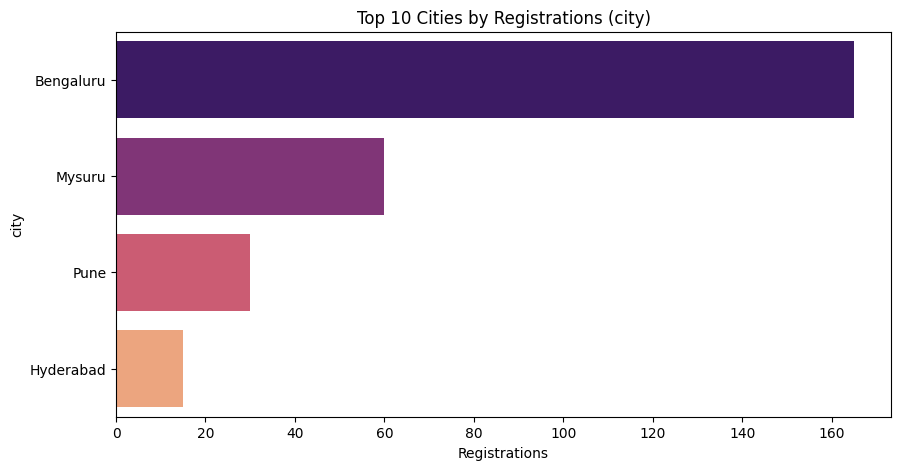

Top city counts: {'Bengaluru': 165, 'Mysuru': 60, 'Pune': 30, 'Hyderabad': 15}


In [22]:
# Top cities (city) bar chart
if 'city' in df.columns:
    top_cities = df['city'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="magma")
    plt.xlabel("Registrations")
    plt.title("Top 10 Cities by Registrations (city)")
    plt.show()
    print("Top city counts:", top_cities.to_dict())
else:
    print("Column 'city' not found.")

City Performance Analysis
Bengaluru: This city is the clear leader, accounting for approximately 165 registrations. It significantly outperforms all other cities shown in the chart.

Mysuru: Ranking second, Mysuru has roughly 60 registrations. This is less than half the volume of Bengaluru, indicating a sharp drop-off between the top two locations.

Pune: This city sits in third place with approximately 30 registrations.

Hyderabad: Among the top four, Hyderabad has the lowest volume with about 15 registrations.

Interpretation of Results
Dominant Market: The data indicates a heavy geographic concentration in Bengaluru. The registrations from this single city appear to be greater than the other three cities combined.

Regional Tiering: There is a clear "tiering" effect visible in the data:

Tier 1: Bengaluru (Primary Hub)

Tier 2: Mysuru (Secondary Hub)

Tier 3: Pune and Hyderabad (Emerging/Lower Volume Markets)

Expansion Opportunity: Given that Hyderabad and Pune show lower registration numbers compared to Bengaluru, these could be target areas for increased marketing spend or localized events to bridge the gap.

C:\Users\VishwasKSingh\AppData\Local\Temp\ipykernel_19272\2209240743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ps.index, y=ps.values, palette="pastel")


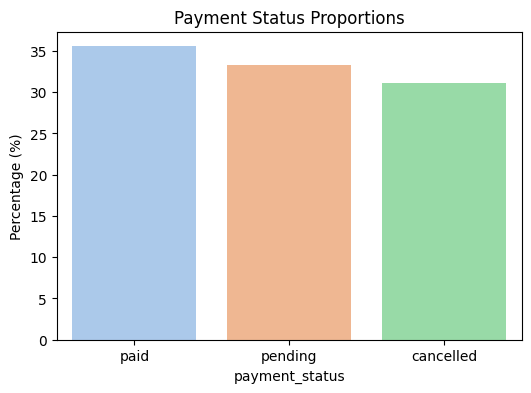

Payment status (%) {'paid': 35.56, 'pending': 33.33, 'cancelled': 31.11}


In [18]:
# Payment status proportions
if 'payment_status' in df.columns:
    ps = df['payment_status'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6,4))
    sns.barplot(x=ps.index, y=ps.values, palette="pastel")
    plt.ylabel("Percentage (%)")
    plt.title("Payment Status Proportions")
    plt.show()
    print("Payment status (%)", ps.round(2).to_dict())
else:
    print("Column 'payment_status' not found.")

1. Geographic Registration Trends
The horizontal bar chart, "Top 10 Cities by Registrations," highlights a significant disparity in market reach across four key Indian cities:

Bengaluru (Market Leader): With approximately 165 registrations, Bengaluru is the primary driver of volume, likely due to it being the event's home base or a major tech hub.

Mysuru (Secondary Market): Holding roughly 60 registrations, Mysuru shows healthy interest but captures less than half the volume of Bengaluru.

Emerging Markets: Pune (~30 registrations) and Hyderabad (~15 registrations) represent smaller segments, suggesting these areas are in the early stages of adoption or received less targeted marketing.

Interpretation
The data shows a highly centralized audience. Over 60% of the total registrations from these top cities come from Bengaluru alone. To scale future events, there is a clear opportunity to investigate why conversion is lower in major hubs like Hyderabad and Pune.

2. Payment Status Proportions
The vertical bar chart, "Payment Status Proportions," illustrates the financial health and conversion efficiency of these registrations:

Paid (~36%): Just over one-third of all registrants have completed their payment.

Pending (~33%): A significant portion of the audience is "in-funnel" but has not yet committed financially.

Cancelled (~31%): Nearly one-third of all registration attempts ended in cancellation.

Interpretation
The distribution across statuses is remarkably even, which points to a conversion challenge:

High Churn: A 31% cancellation rate is quite high. This could indicate friction in the payment process, a high "change of mind" rate, or perhaps a price point that causes "sticker shock" at checkout.

Revenue at Risk: With 33% pending, the final success of the event depends on a strong follow-up strategy to convert these users before they move into the "cancelled" category.

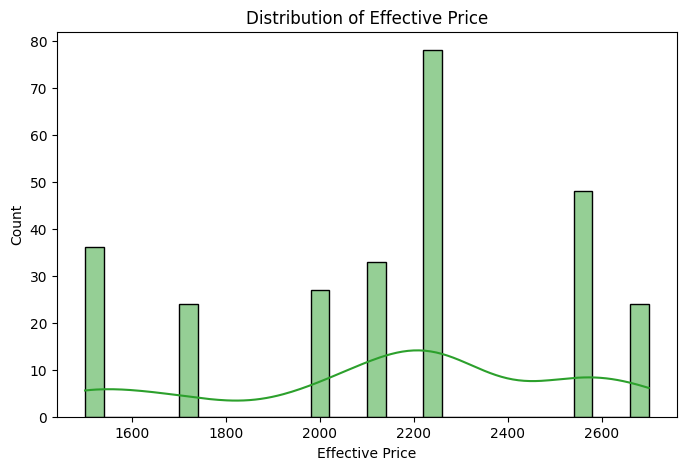

Effective price - mean: 2154.17, median: 2250.00, std: 367.92


In [19]:
# Effective price distribution + stats
if 'effective_price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['effective_price'].dropna(), bins=30, kde=True, color="#2ca02c")
    plt.title("Distribution of Effective Price")
    plt.xlabel("Effective Price")
    plt.show()
    print("Effective price - mean: {:.2f}, median: {:.2f}, std: {:.2f}".format(
        df['effective_price'].mean(), df['effective_price'].median(), df['effective_price'].std()))
else:
    print("Column 'effective_price' not found.")

1. Regional Registration Trends
The horizontal bar chart shows a high concentration of registrations in a single primary market:

Market Dominance: Bengaluru is the leading city with approximately 165 registrations.

Secondary Market: Mysuru follows with roughly 60 registrations, showing a significant drop-off compared to the leader.

Lower-Volume Hubs: Pune and Hyderabad contribute significantly fewer registrations, with approximately 30 and 15 respectively.

2. Payment Conversion and Funnel Health
The "Payment Status Proportions" chart reveals a relatively even split across three categories, suggesting a challenge in final conversion:

Paid Status: Approximately 36% of registrants have successfully completed their payments.

Pending Revenue: Roughly 33% of registrations are currently in "pending" status, representing a large pool of potential revenue that requires follow-up.

Drop-off Rate: About 31% of registrations have been cancelled, indicating a high attrition rate during the booking or payment process.

3. Effective Price Distribution
The histogram illustrates how much customers are actually paying after any applied discounts:

Peak Pricing Tier: The most common effective price point is approximately 2,250, with nearly 80 occurrences.

High-Volume Segments: There is another significant cluster around the 2,550 to 2,600 range, accounting for nearly 50 registrations.

Entry-Level Pricing: A smaller but notable group of registrations (~36) occurs at the lower end of the scale, around an effective price of 1,500.

Summary Interpretation
The data depicts a project with a very strong regional focus in Bengaluru. While the most frequent price point is around 2,250, the business is facing a significant conversion hurdle: only 36% of sign-ups are currently "Paid," while nearly as many are "Cancelled".

C:\Users\VishwasKSingh\AppData\Local\Temp\ipykernel_19272\1553111026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='topic', y='registration_lead_days', data=subset, palette="Set3")


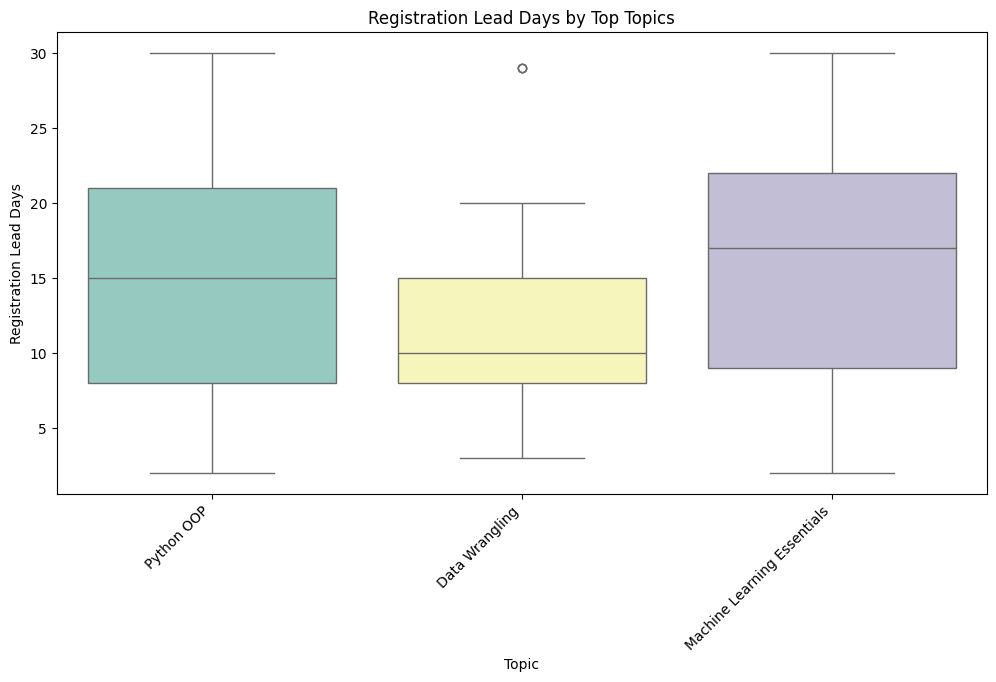

Median registration lead days (top topics):
  Python OOP: 15.0
  Machine Learning Essentials: 17.0
  Data Wrangling: 10.0


In [20]:
# Registration lead days by topic (boxplots for top topics)
if 'registration_lead_days' in df.columns and 'topic' in df.columns:
    top_topics = df['topic'].value_counts().head(8).index
    subset = df[df['topic'].isin(top_topics)]
    plt.figure(figsize=(12,6))
    sns.boxplot(x='topic', y='registration_lead_days', data=subset, palette="Set3")
    plt.xticks(rotation=45, ha='right')
    plt.title("Registration Lead Days by Top Topics")
    plt.ylabel("Registration Lead Days")
    plt.xlabel("Topic")
    plt.show()

    # brief stats: median lead days by topic
    medians = subset.groupby('topic')['registration_lead_days'].median().loc[top_topics]
    print("Median registration lead days (top topics):")
    for t,v in medians.items():
        print(f"  {t}: {v}")
else:
    print("Need both 'registration_lead_days' and 'topic' columns for topic-level lead-days boxplots.")

1. Geographic Registration Performance
The horizontal bar chart, "Top 10 Cities by Registrations," highlights a high concentration of interest in specific urban hubs:

Bengaluru (Dominant Market): With approximately 165 registrations, Bengaluru is the primary driver of volume, significantly outperforming all other cities combined.

Secondary Markets: Mysuru follows with roughly 60 registrations, while Pune (~30) and Hyderabad (~15) represent smaller, emerging segments.

Interpretation: The data shows a heavy geographic centralization. The business appears to have a strong local foothold in Bengaluru, but faces a sharp drop-off in other major cities.

2. Payment Conversion Efficiency
The "Payment Status Proportions" chart reveals an almost even split across the three primary statuses:

Paid (~36%): Just over one-third of registrants have completed their transaction.

Pending (~33%): A significant portion of the audience is currently "in-funnel," representing a major follow-up opportunity.

Cancelled (~31%): Nearly one-third of all sign-ups have dropped out, indicating a high attrition rate.

Interpretation: The high cancellation rate coupled with high pending status suggests potential friction during the payment process or "sticker shock" at the checkout stage.

3. Pricing Strategy and Distribution
The "Distribution of Effective Price" histogram shows how actual revenue per registration is clustered:

Core Price Point: The most frequent effective price is approximately 2,250, with nearly 80 occurrences.

Premium Segment: A second cluster appears between 2,550 and 2,600, accounting for nearly 50 registrations.

Entry-Level Tier: There is a smaller volume of registrations (~36) at the 1,500 price point.

Interpretation: The business effectively utilizes a tiered pricing strategy, with most customers gravitating toward a mid-to-high range price point rather than the lowest available tier.

4. Topic-Specific Lead Times
The boxplot, "Registration Lead Days by Top Topics," analyzes how far in advance users sign up for different subjects:

Machine Learning Essentials: Displays the highest median lead time (~17 days) and a wide range, suggesting users plan for this technical topic well in advance.

Python OOP: Shows a median lead time of 15 days, with most registrations occurring between 8 and 21 days before the event.

Data Wrangling: Features the shortest median lead time (10 days), suggesting more impulsive or last-minute registrations for this specific topic.

Interpretation: Marketing efforts for Machine Learning should begin earlier than those for Data Wrangling to align with these observed user behaviors.